In [0]:
from keras.datasets import cifar100

import collections, numpy

In [5]:
data=cifar100.load_data(label_mode='fine')
(x_train, y_train), (x_test, y_test) = data

169009152/169001437 [==============================] - 12s 0us/step


In [0]:
#data size
len(x_train)+len(x_test)

60000

1.a. as you can see the data size is 60000 samples of trainig data_ testing data

In [0]:
#sample dimensions
x_train[0].shape

(32, 32, 3)

In [0]:
#train data calsses
unique, counts = numpy.unique(y_train, return_counts=True)
dict(zip(unique, counts))

In [0]:
#test data calsses
unique, counts = numpy.unique(y_test, return_counts=True)
dict(zip(unique, counts))

1.b. each sample have 3 dimensions and 3 channels (RGB), the train data have 100 classes and except of seperate the data to train and test he dont need to reproccess it

1.c the data is balanced there is 600 samples for each class and we sepearated the data to 500 samples of each class for training and 100 samples for testing

1.d. there is couple of benchmark to ciphar data the top5 currently are:
* Efficient Training of Giant Neural Networks using Pipeline Parallelism with acc of 91.3
* AutoAugment: Learning Augmentation Policies from Data with acc of 89.33
* ShakeDrop Regularization with acc of with acc of 87.81
* XNAS: Neural Architecture Search with Expert Advice with acc of 86.4
* Improved Regularization of Convolutional Neural Networks with Cutout 84.8

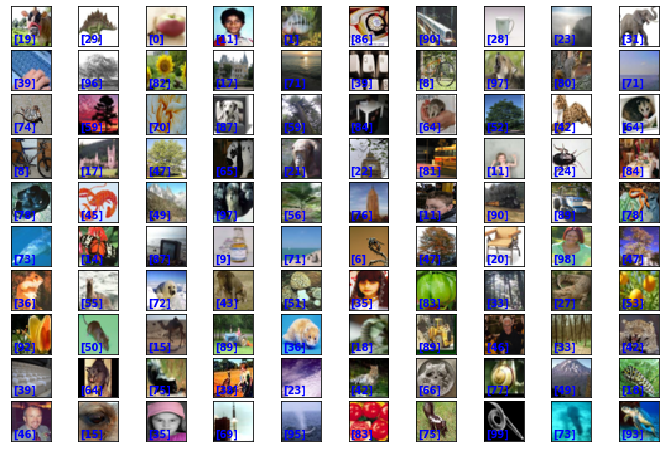

In [5]:
from matplotlib import pyplot
#ploting samples of the data
def plot_multiple_imgs(X,y,nrow=2,ncol=2,figsize=(13,7),preds=None,skip=0):
    fig,ax = pyplot.subplots(nrows=nrow,ncols=ncol,figsize=figsize)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(nrow*ncol):
        ax[i//ncol,i%ncol].imshow(X[skip+i],cmap='binary')
        ax[i//ncol,i%ncol].set_xticks([])
        ax[i//ncol,i%ncol].set_yticks([])
        if preds is not None:
            ax[i//ncol,i%ncol].text(0.85, 0.1, str(preds[skip+i]), transform=ax[i//ncol,i%ncol].transAxes,
                                   color='green' if y[skip+i]==preds[skip+i] else 'red',weight='bold')
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
        else:
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
    pyplot.show()
plot_multiple_imgs(x_train,y_train,10,10,(12,8))

In [0]:
from keras.utils import print_summary, to_categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,ZeroPadding2D, Dropout, Activation
#building the model
model = Sequential()

model.add(Conv2D(32,(3,3), padding = 'same',activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation("softmax"))

In [0]:
#Compile the model
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.rmsprop(lr=0.0001, decay = 1e-6), metrics=['accuracy'])

In [0]:
#Train the model
hist=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 15s 382us/step - loss: 4.9339 - acc: 0.0156 - val_loss: 4.4249 - val_acc: 0.0291
Epoch 2/50
40000/40000 [==============================] - 14s 352us/step - loss: 4.3417 - acc: 0.0360 - val_loss: 4.1932 - val_acc: 0.0665
Epoch 3/50
40000/40000 [==============================] - 14s 351us/step - loss: 4.1371 - acc: 0.0622 - val_loss: 3.9546 - val_acc: 0.1087
Epoch 4/50
40000/40000 [==============================] - 14s 351us/step - loss: 3.9324 - acc: 0.0916 - val_loss: 3.8618 - val_acc: 0.1214
Epoch 5/50
40000/40000 [==============================] - 14s 351us/step - loss: 3.7700 - acc: 0.1182 - val_loss: 3.6207 - val_acc: 0.1611
Epoch 6/50
40000/40000 [==============================] - 14s 351us/step - loss: 3.6474 - acc: 0.1404 - val_loss: 3.6002 - val_acc: 0.1639
Epoch 7/50
40000/40000 [==============================] - 14s 350us/step - loss: 3.5474 - acc: 0.1580 - val_loss: 3.

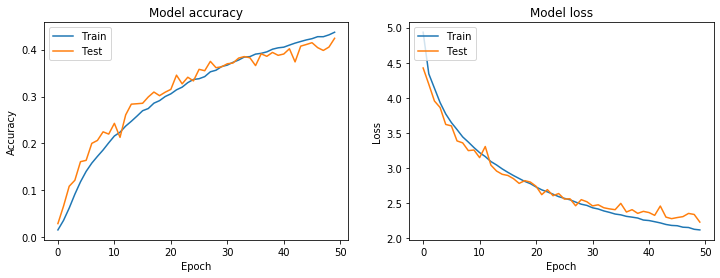

In [0]:
# Plot training & validation loss values
fig, ax = pyplot.subplots(1,2,figsize=(12,4))
ax[0].plot(hist.history['acc'])
ax[0].plot(hist.history['val_acc'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')
pyplot.show()

as you can see from the accuracy graph, in training data and the testing data the accuracy rate was pretty similar(~42%)

model accuracy on test set is: 43.32%


Text(0.5, 1, 'classification results on test set')

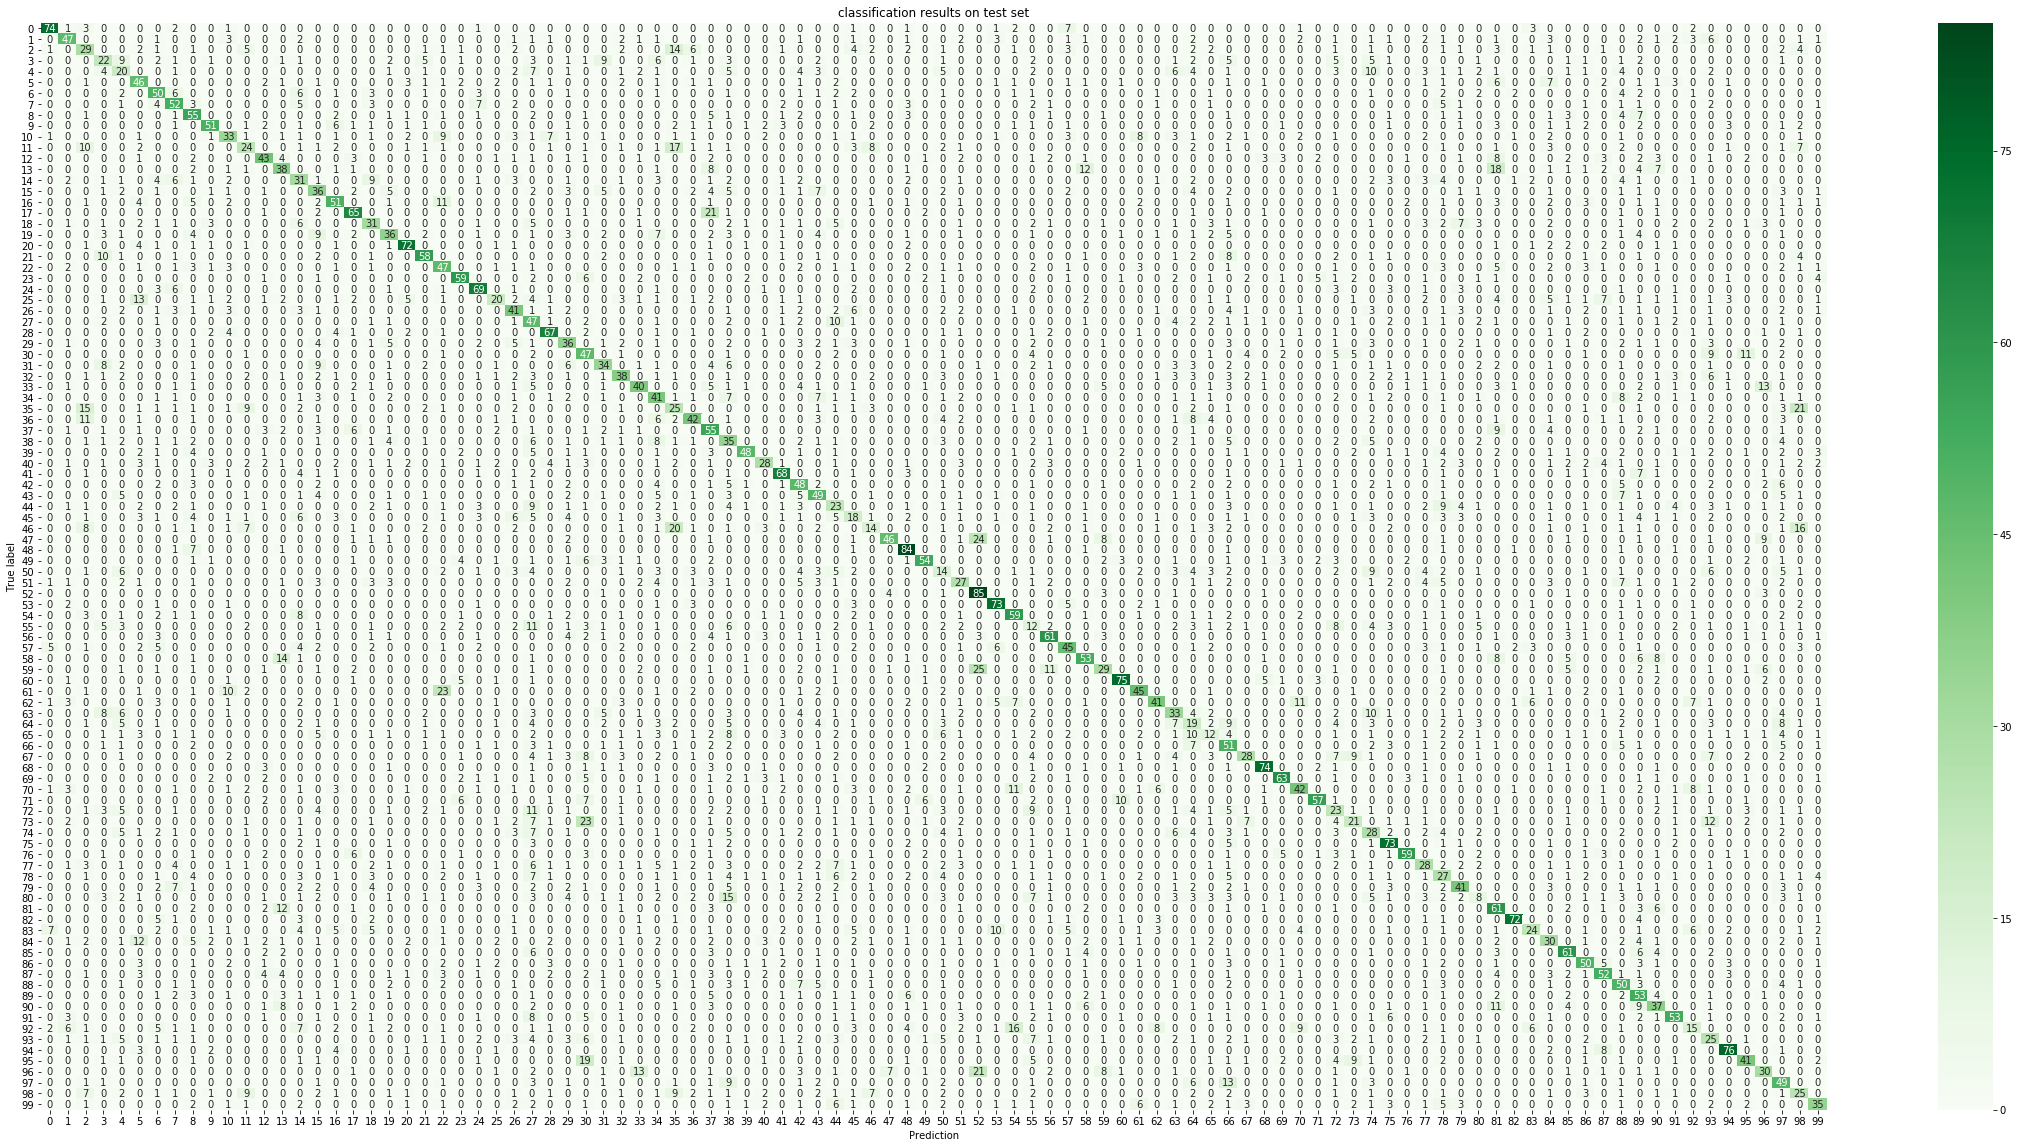

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
#plot the confusion matrix
preds = model.predict(x_test)
pred_cat = np.argmax(preds,axis=1)
print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),pred_cat)*100))
fig, ax = pyplot.subplots(figsize=(40,20))
ax=sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_cat),cmap='Greens',annot=True, fmt='d')
pyplot.xlabel('Prediction')
pyplot.ylabel('True label')
pyplot.title('classification results on test set')

2.c:
from the confusion matrix bellow you can see that our model have some classes that thier misclassifying is much higher then others (like classes 25,46,55 etc).
the missclassification could happen becouse our activation function isnt suitable to our model or our model isnt trained enough(only 50 epochs).

3 ways to improve our model:
1. change the activation function of our model
2. raise the number of filters on the conv2d layers
3. raise the number of epochs


In [0]:
model.save('first_model.h5')

In [0]:
#building the model
model = Sequential()

model.add(Conv2D(128,(3,3), padding = 'same',activation='elu', input_shape = x_train.shape[1:]))
model.add(Conv2D(128, (3,3),activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),activation='elu', padding='same'))
model.add(Conv2D(256, (3, 3),activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3),activation='elu', padding='same'))
model.add(Conv2D(512, (3, 3),activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation("softmax"))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.rmsprop(lr=0.0001, decay = 1e-6), metrics=['accuracy'])

In [0]:
#Train the model
hist=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 51s 1ms/step - loss: 4.4475 - acc: 0.0921 - val_loss: 3.4344 - val_acc: 0.1916
Epoch 2/50
40000/40000 [==============================] - 50s 1ms/step - loss: 3.4048 - acc: 0.1987 - val_loss: 3.1050 - val_acc: 0.2546
Epoch 3/50
40000/40000 [==============================] - 50s 1ms/step - loss: 3.0581 - acc: 0.2638 - val_loss: 2.8707 - val_acc: 0.3109
Epoch 4/50
40000/40000 [==============================] - 50s 1ms/step - loss: 2.7790 - acc: 0.3188 - val_loss: 2.7216 - val_acc: 0.3386
Epoch 5/50
40000/40000 [==============================] - 50s 1ms/step - loss: 2.5646 - acc: 0.3608 - val_loss: 2.3650 - val_acc: 0.4041
Epoch 6/50
40000/40000 [==============================] - 50s 1ms/step - loss: 2.3565 - acc: 0.4016 - val_loss: 2.2793 - val_acc: 0.4220
Epoch 7/50
40000/40000 [==============================] - 50s 1ms/step - loss: 2.1812 - acc: 0.4368 - val_loss: 2.1274 - val_acc

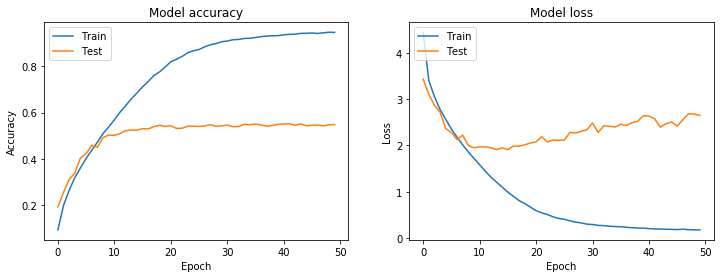

In [0]:
# Plot training & validation loss values
fig, ax = pyplot.subplots(1,2,figsize=(12,4))
ax[0].plot(hist.history['acc'])
ax[0].plot(hist.history['val_acc'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')
pyplot.show()

as you can see in the new model graphs, the model is more overfitted to the training data, eventhough the model is overfitted the testing results are also better then the previous model(raised from 43% to 55%).

model accuracy on test set is: 55.76%


Text(0.5, 1, 'classification results on test set')

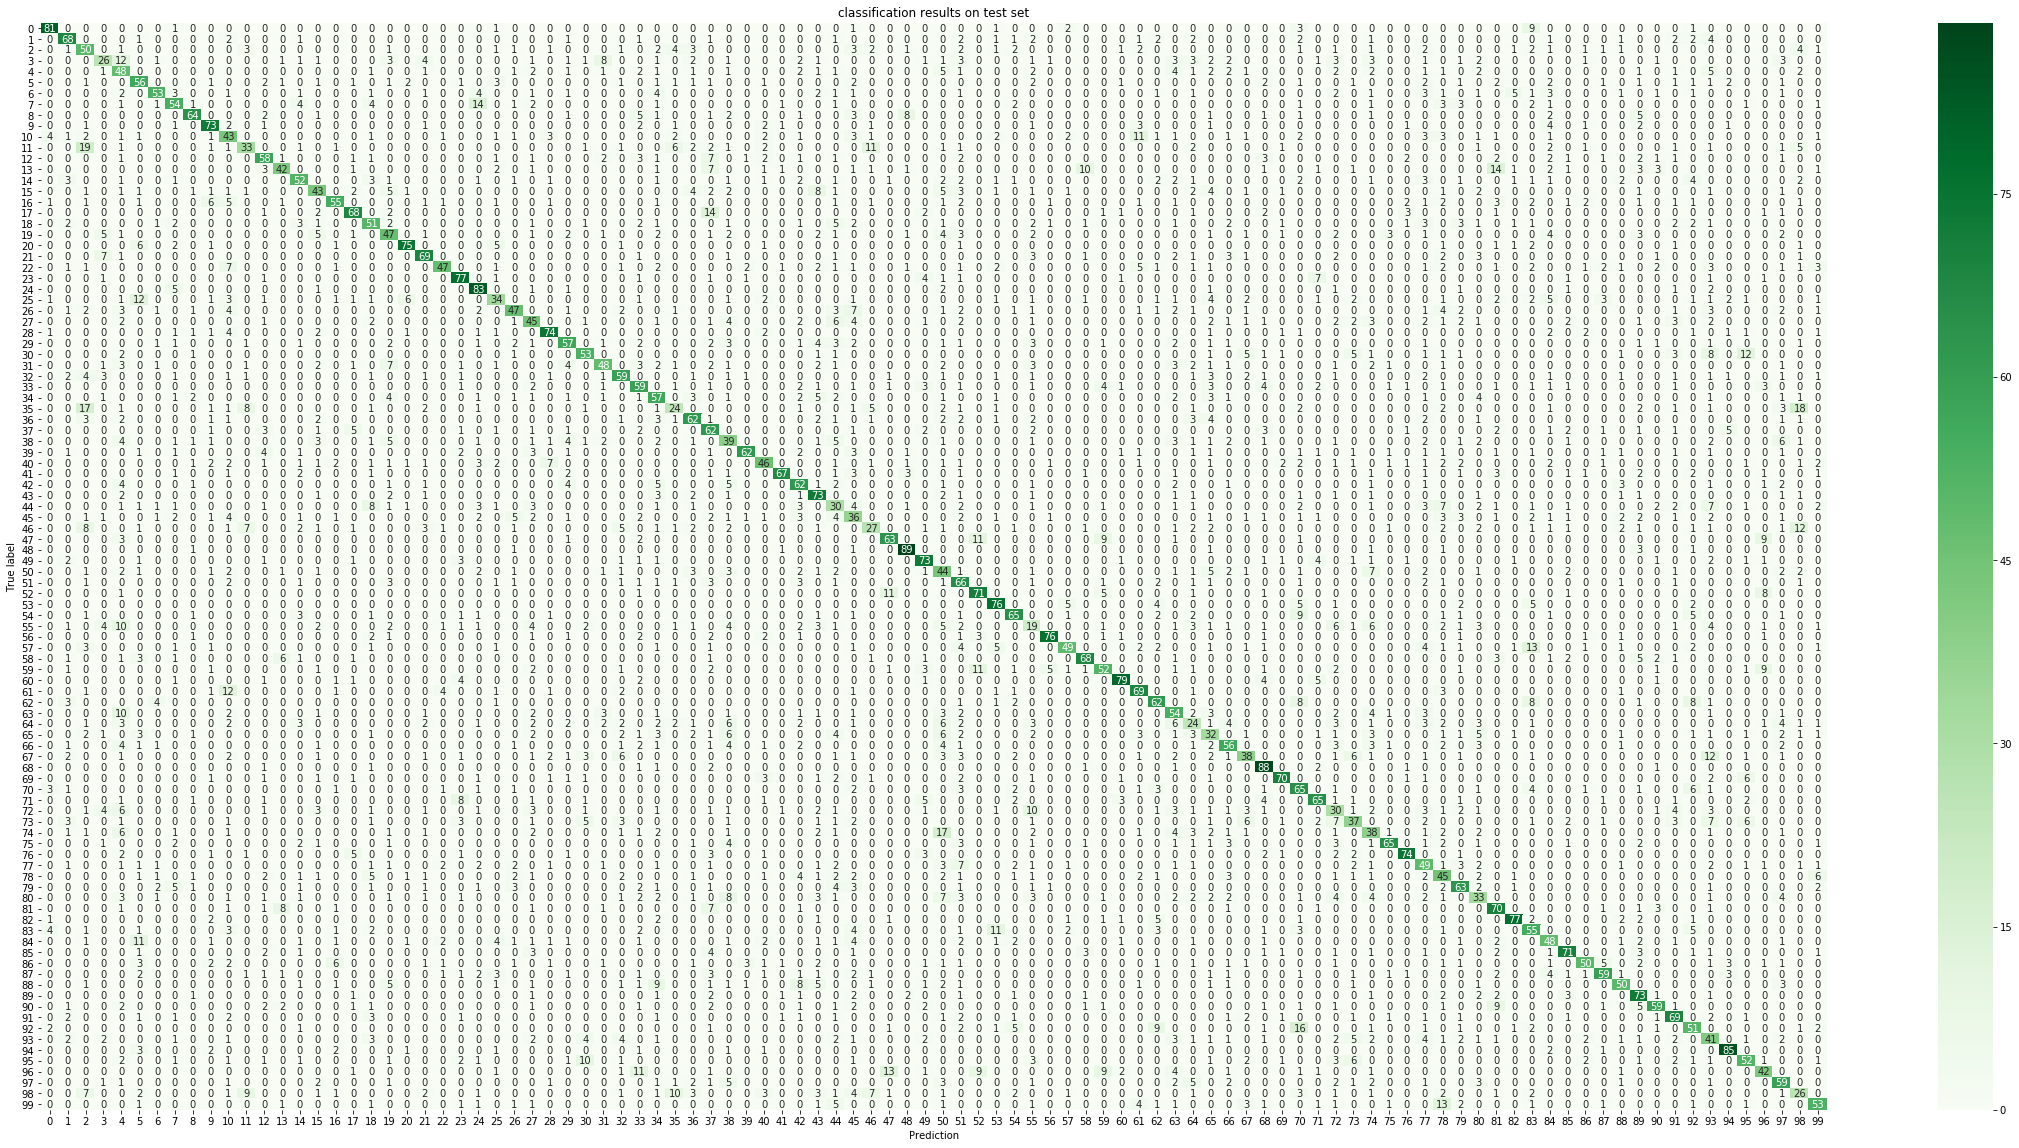

In [0]:
#plot the confusion matrix
preds = model.predict(x_test)
pred_cat = np.argmax(preds,axis=1)
print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),pred_cat)*100))
fig, ax = pyplot.subplots(figsize=(40,20))
ax=sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_cat),cmap='Greens',annot=True, fmt='d')
pyplot.xlabel('Prediction')
pyplot.ylabel('True label')
pyplot.title('classification results on test set')

3.a 3)	We selected a trained model architecture VGG16 that trained on a cifar-100 data-set.

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers

class cifar100vgg:
    def __init__(self,train=True):
        self.num_classes = 100
        self.weight_decay = 0.0005
        self.x_shape = [32,32,3]

        self.model = self.build_model()
        if train:
            self.model = self.train(self.model)
        else:
            self.model.load_weights("/content/drive/My Drive/cifar100vgg.h5")


    def build_model(self):
        # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

        model = Sequential()
        weight_decay = self.weight_decay

        model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=self.x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.5))
        model.add(Dense(self.num_classes))
        model.add(Activation('softmax'))
        return model


    def normalize(self,X_train,X_test):
        #this function normalize inputs for zero mean and unit variance
        # it is used when training a model.
        # Input: training set and test set
        # Output: normalized training set and test set according to the trianing set statistics.
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        print(mean)
        print(std)
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test

    def normalize_production(self,x):
        #this function is used to normalize instances in production according to saved training set statistics
        # Input: X - a training set
        # Output X - a normalized training set according to normalization constants.

        #these values produced during first training and are general for the standard cifar10 training set normalization
        mean = 121.936
        std = 68.389
        return (x-mean)/(std+1e-7)

    def predict(self,x,normalize=True,batch_size=50):
        if normalize:
            x = self.normalize_production(x)
        return self.model.predict(x,batch_size)

    def train(self,model):

        #training parameters
        batch_size = 128
        maxepoches = 250
        learning_rate = 0.1
        lr_decay = 1e-6
        lr_drop = 20

        # The data, shuffled and split between train and test sets:
        # (x_train, y_train), (x_test, y_test) = cifar100.load_data()
        X_train = x_train.astype('float32')
        X_test = x_test.astype('float32')
        X_train, X_test = self.normalize(X_train, X_test)

        Y_train = keras.utils.to_categorical(y_train, self.num_classes)
        Y_test = keras.utils.to_categorical(y_test, self.num_classes)


        def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
        reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)


        #data augmentation
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(X_train)



        #optimization details
        sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


        # training process in a for loop with learning rate drop every 25 epoches.

        historytemp = model.fit_generator(datagen.flow(X_train, Y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=X_train.shape[0] // batch_size,
                            epochs=maxepoches,
                            validation_data=(X_test, Y_test),callbacks=[reduce_lr],verbose=2)
        return model


In [0]:
model = cifar100vgg(train=False)

model accuracy on test set is: 70.48%


Text(0.5, 1, 'classification results on test set')

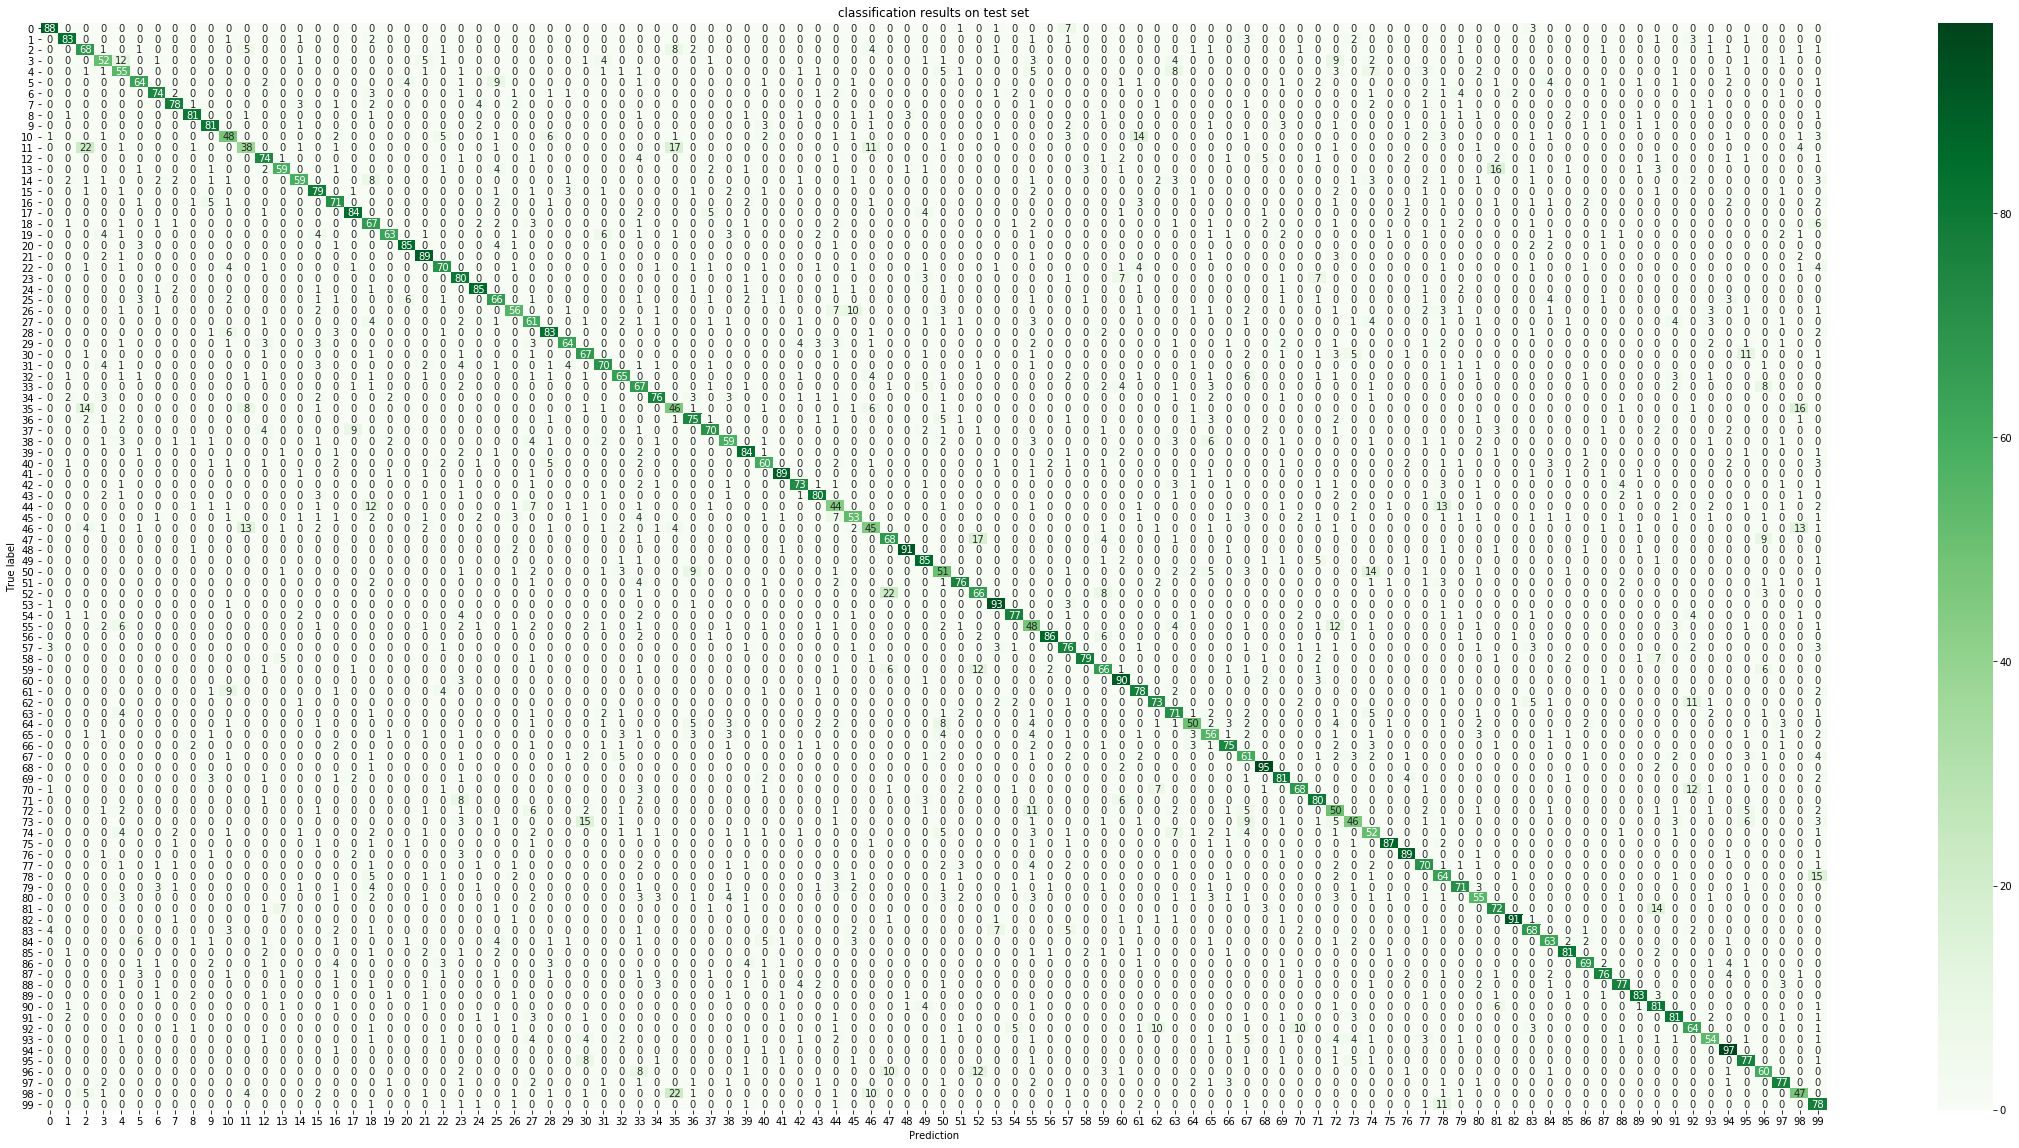

In [9]:
#plot the confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
preds = model.predict(x_test)
pred_cat = np.argmax(preds,axis=1)
print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),pred_cat)*100))
fig, ax = pyplot.subplots(figsize=(40,20))
ax=sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_cat),cmap='Greens',annot=True, fmt='d')
pyplot.xlabel('Prediction')
pyplot.ylabel('True label')
pyplot.title('classification results on test set')

In [0]:
model.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 64)       

3.d The feture extraction of a vgg16-cifar100 model profermed on a train and test set.

In [0]:
import numpy as np
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import cv2

def features_extraction(data):
  feats=[]
  images = np.reshape(data,(data.shape[0],32,32,3))  
  counter=0
  for img_count in images:
    counter = counter + 1
    x_in = image.img_to_array(img_count)
    x_in = np.expand_dims(x_in, axis=0)
    x_in = preprocess_input(x_in)
    features = model.predict(x_in)
    feats.append(features)
  return np.squeeze(np.asarray(feats))


# features_extraction on a train
feature_list_train = features_extraction(x_train)
# features_extraction on a test
feature_list_test = features_extraction(x_test)


We classifier the features extraction on a Decision Tree classifier. 

In [13]:
from sklearn.metrics import accuracy_score
from sklearn import tree

#Convert the labels to one-hot encoding
trainImageLabels = keras.utils.to_categorical(y_train, num_classes=100)
trainImageLabels = keras.utils.to_categorical(y_test, num_classes=100)

clf = tree.DecisionTreeClassifier().fit(feature_list_train, y_train)
pred = clf.predict(feature_list_test)
score = accuracy_score(y_test,pred)
print (score)

0.1932


We see the predict is much less score Than the situation that is not features extraction.
